In [3]:
# Importing Libaries

# Data loading
from google.colab import drive

# Data handling and computation
import pandas as pd
import numpy as np
import scipy as sp

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV


# Metrics
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Data Loading

#Read csv file from drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/diabetic_data.csv')
df.head()

Mounted at /content/drive


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


gender 3


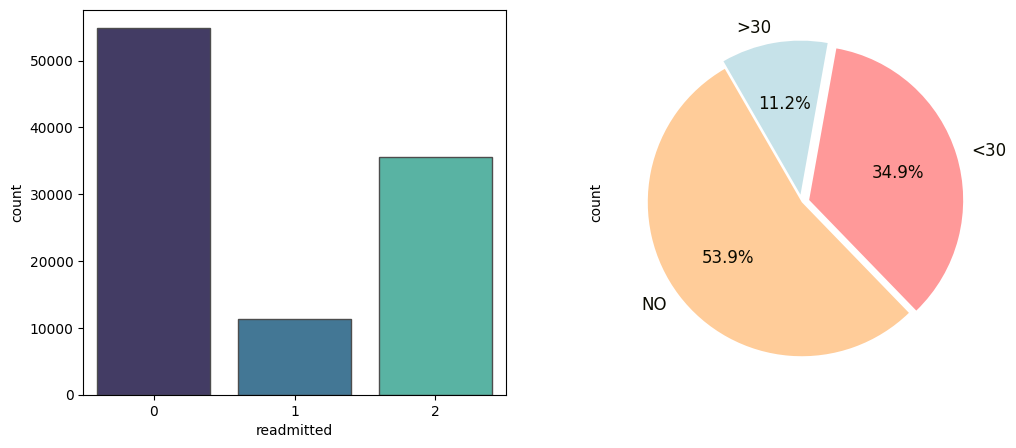

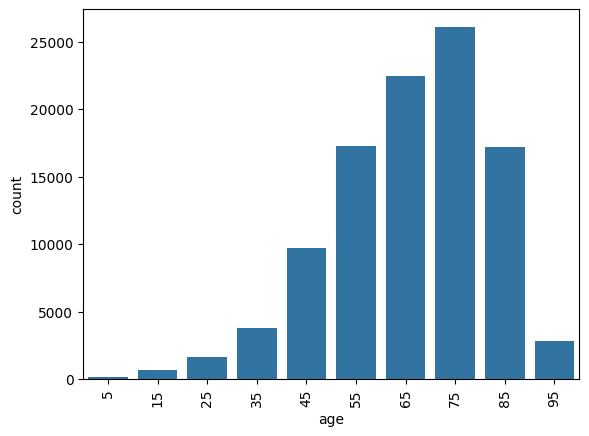

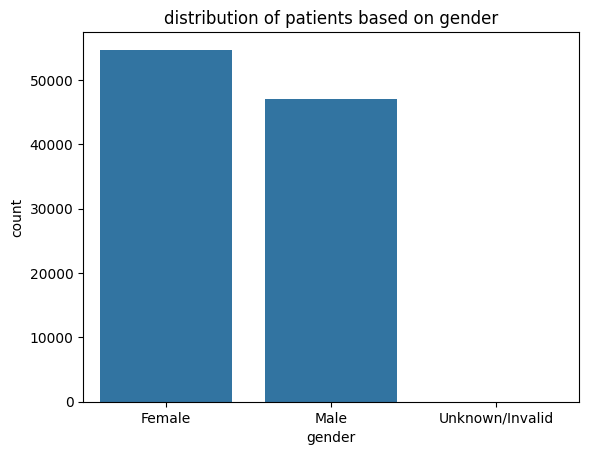

Proportion of race values
gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64


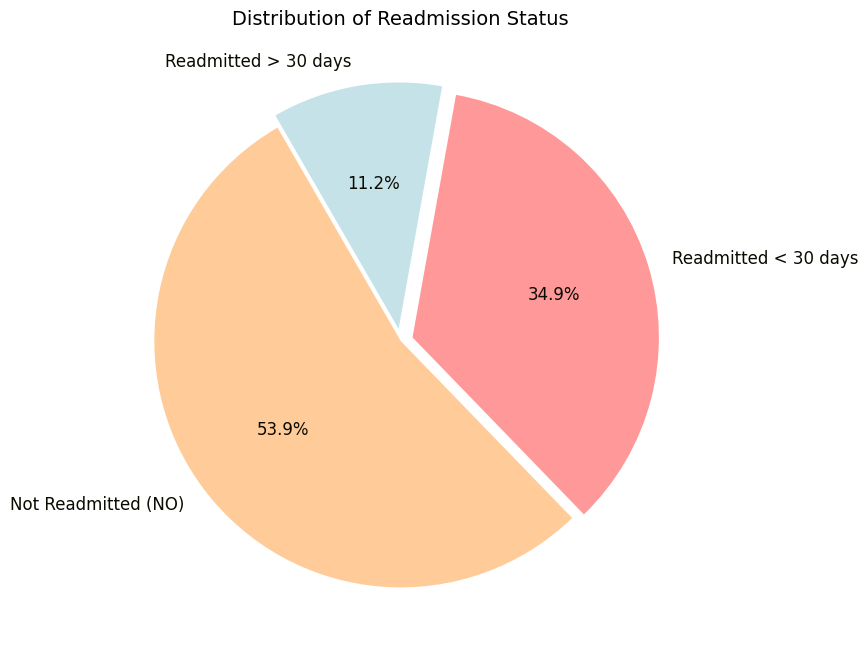

In [5]:
# Exploratory Data Analysis
data = df.copy()
data.head()
data.readmitted = data.readmitted.map({'NO': 0, '<30': 1, '>30': 2})
data.head()

#  count for gender
print('gender', df['gender'][df['gender']== 'Unknown/Invalid'].count())

# Drop columns with large numbers of missing values
df=df.drop (['weight', 'payer_code', 'medical_specialty'], axis=1)

# Readmission data on plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 5))
labels = ['NO', '<30', '>30']
sns.countplot(x=data.readmitted, data=data, ax=ax[0], edgecolor=".3", palette="mako")
data.readmitted.value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=['#ffcc99', '#ff9999', '#c6e2e9'],
                                        labels=labels,explode=(0,0.05, 0.05), startangle=120, textprops={'fontsize': 12, 'color': '#0a0a00'})
plt.show()


# Age distribution
data.age = data.age.replace({'[0-10)': 5,
                                   '[10-20)': 15,
                                   '[20-30)': 25,
                                    '[30-40)': 35,
                                    '[40-50)': 45,
                                    '[50-60)': 55,
                                    '[60-70)': 65,
                                    '[70-80)': 75,
                                    '[80-90)': 85,
                                    '[90-100)': 95})
sns.countplot(x=data.age, data=data)
plt.xticks(rotation=90)
plt.show()

# Plot for count of patients based on gender
sns.countplot(x=data.gender, data=data)
plt.title('distribution of patients based on gender')
plt.show()
print("Proportion of race values")
print(data.gender.value_counts(normalize=True))


#  show the number of who were readmitted or not

fig, ax = plt.subplots(figsize = (8, 8))
labels = ['Not Readmitted (NO)', 'Readmitted < 30 days', 'Readmitted > 30 days']
colors = ['#ffcc99', '#ff9999', '#c6e2e9']
explode = (0, 0.05, 0.05)
data.readmitted.value_counts().plot.pie(autopct='%1.1f%%', ax=ax, colors=colors,
                                        labels=labels,explode=explode, startangle=120, textprops={'fontsize': 12, 'color': '#0a0a00'})

plt.title('Distribution of Readmission Status', fontsize=14)
plt.ylabel('')
plt.show()

Missing values per column:
 encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
0                               0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride         

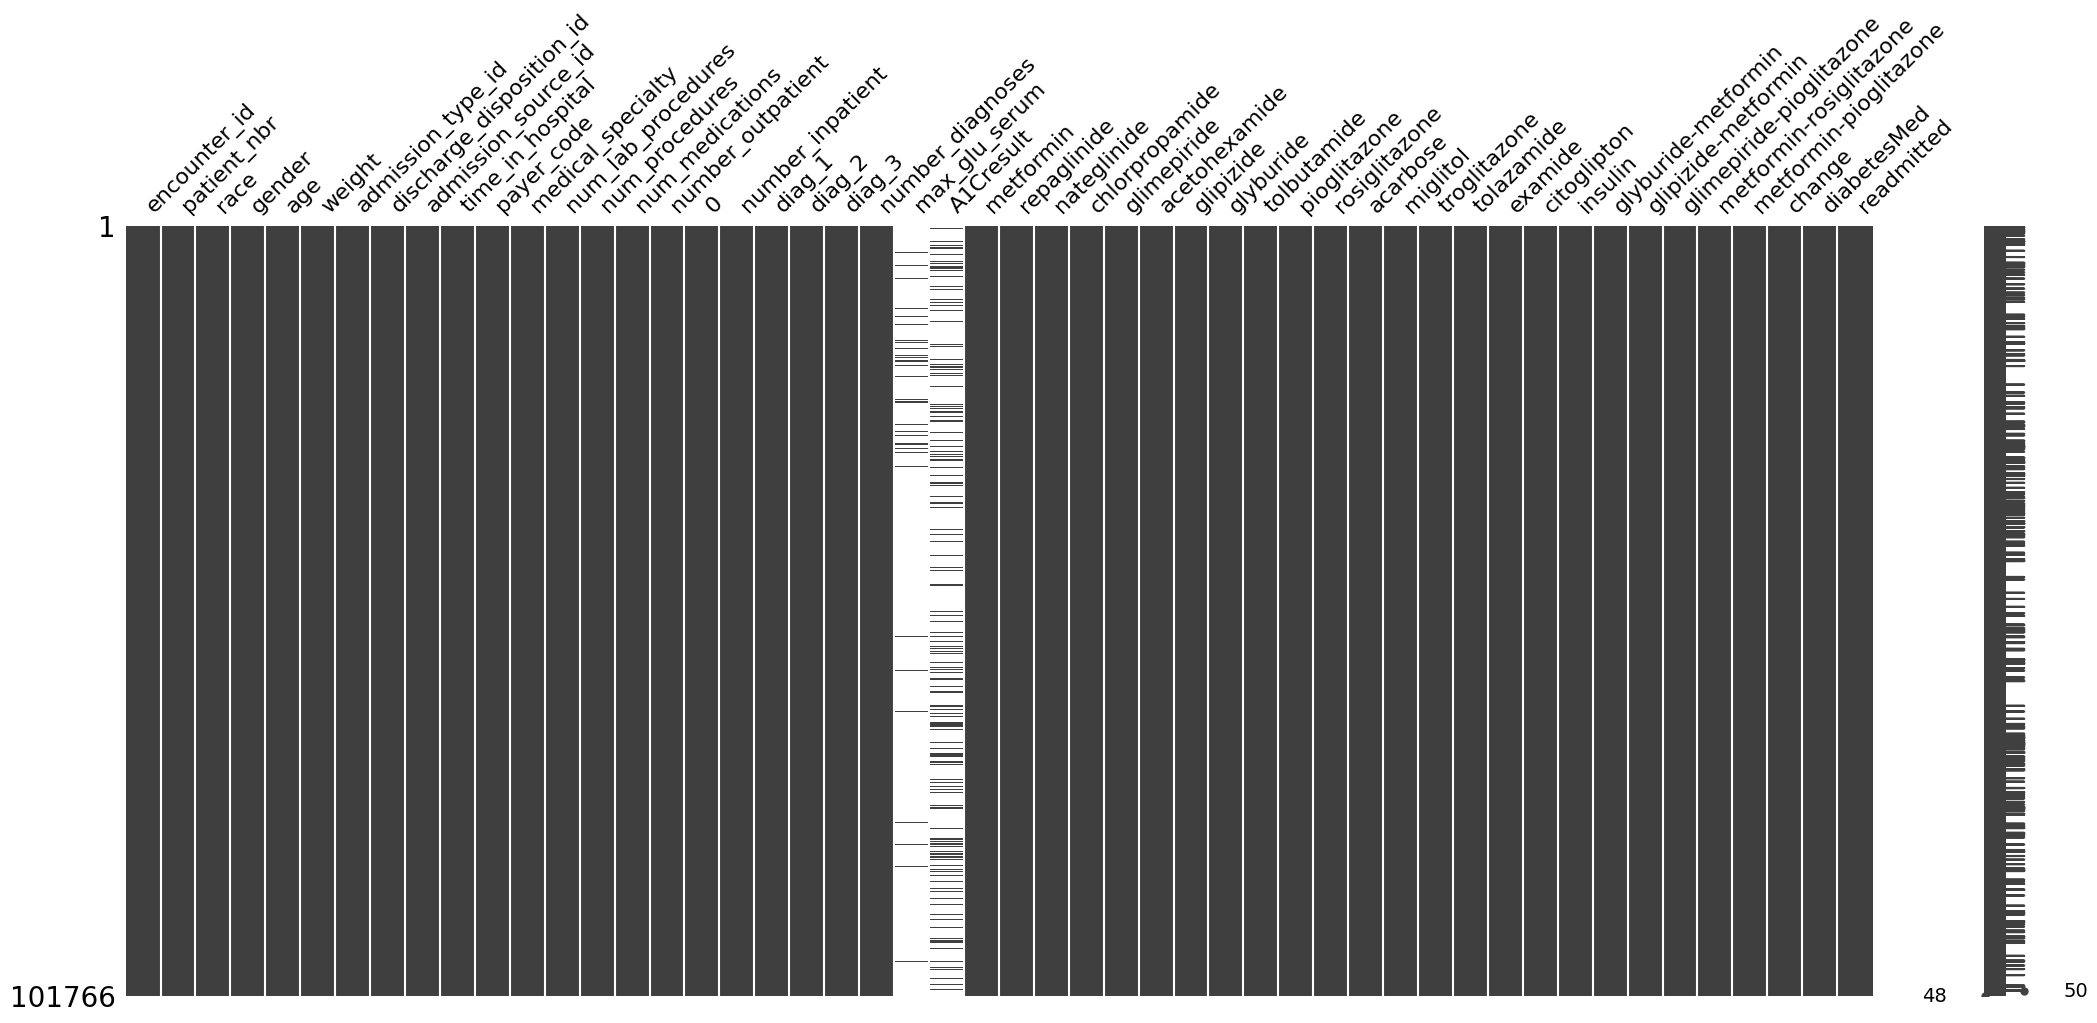

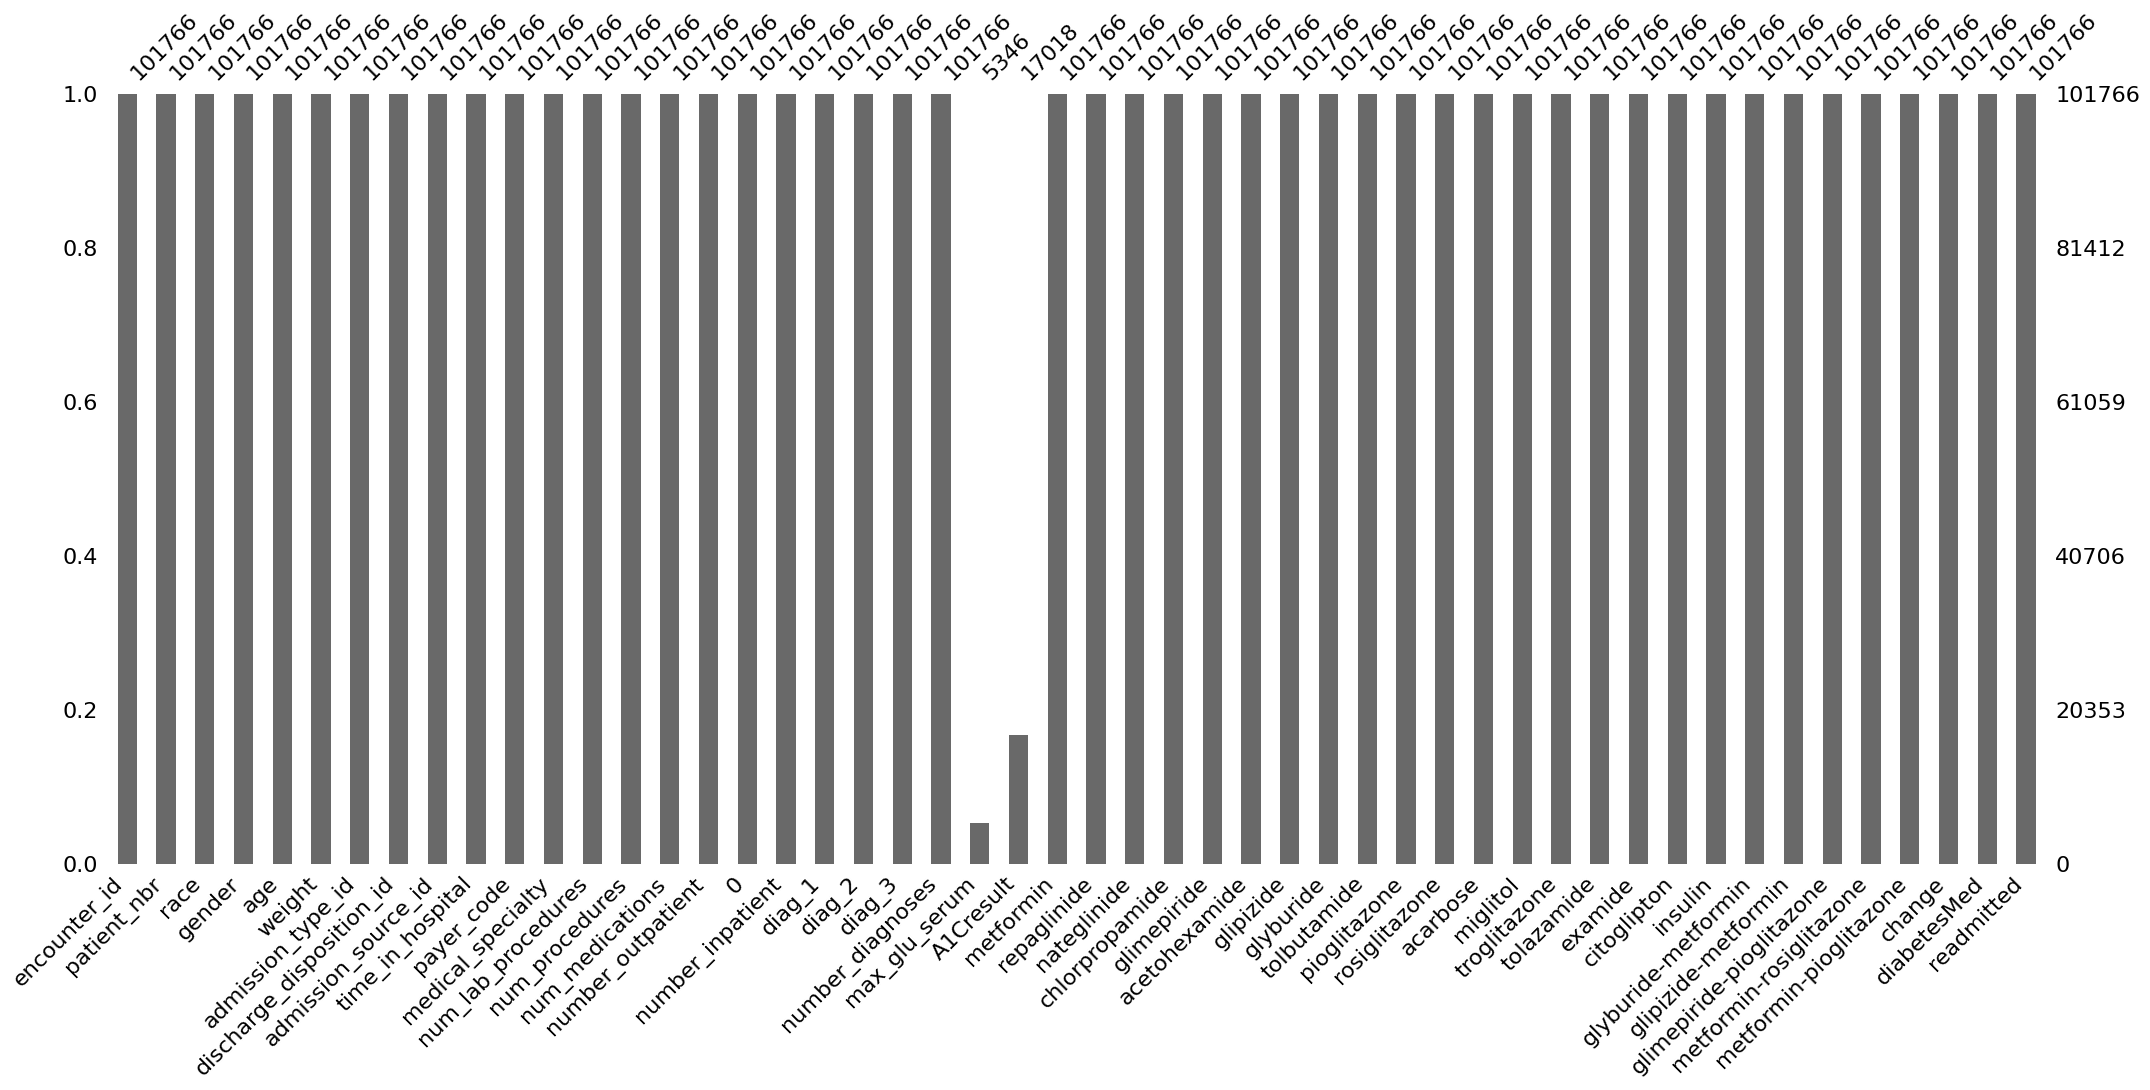

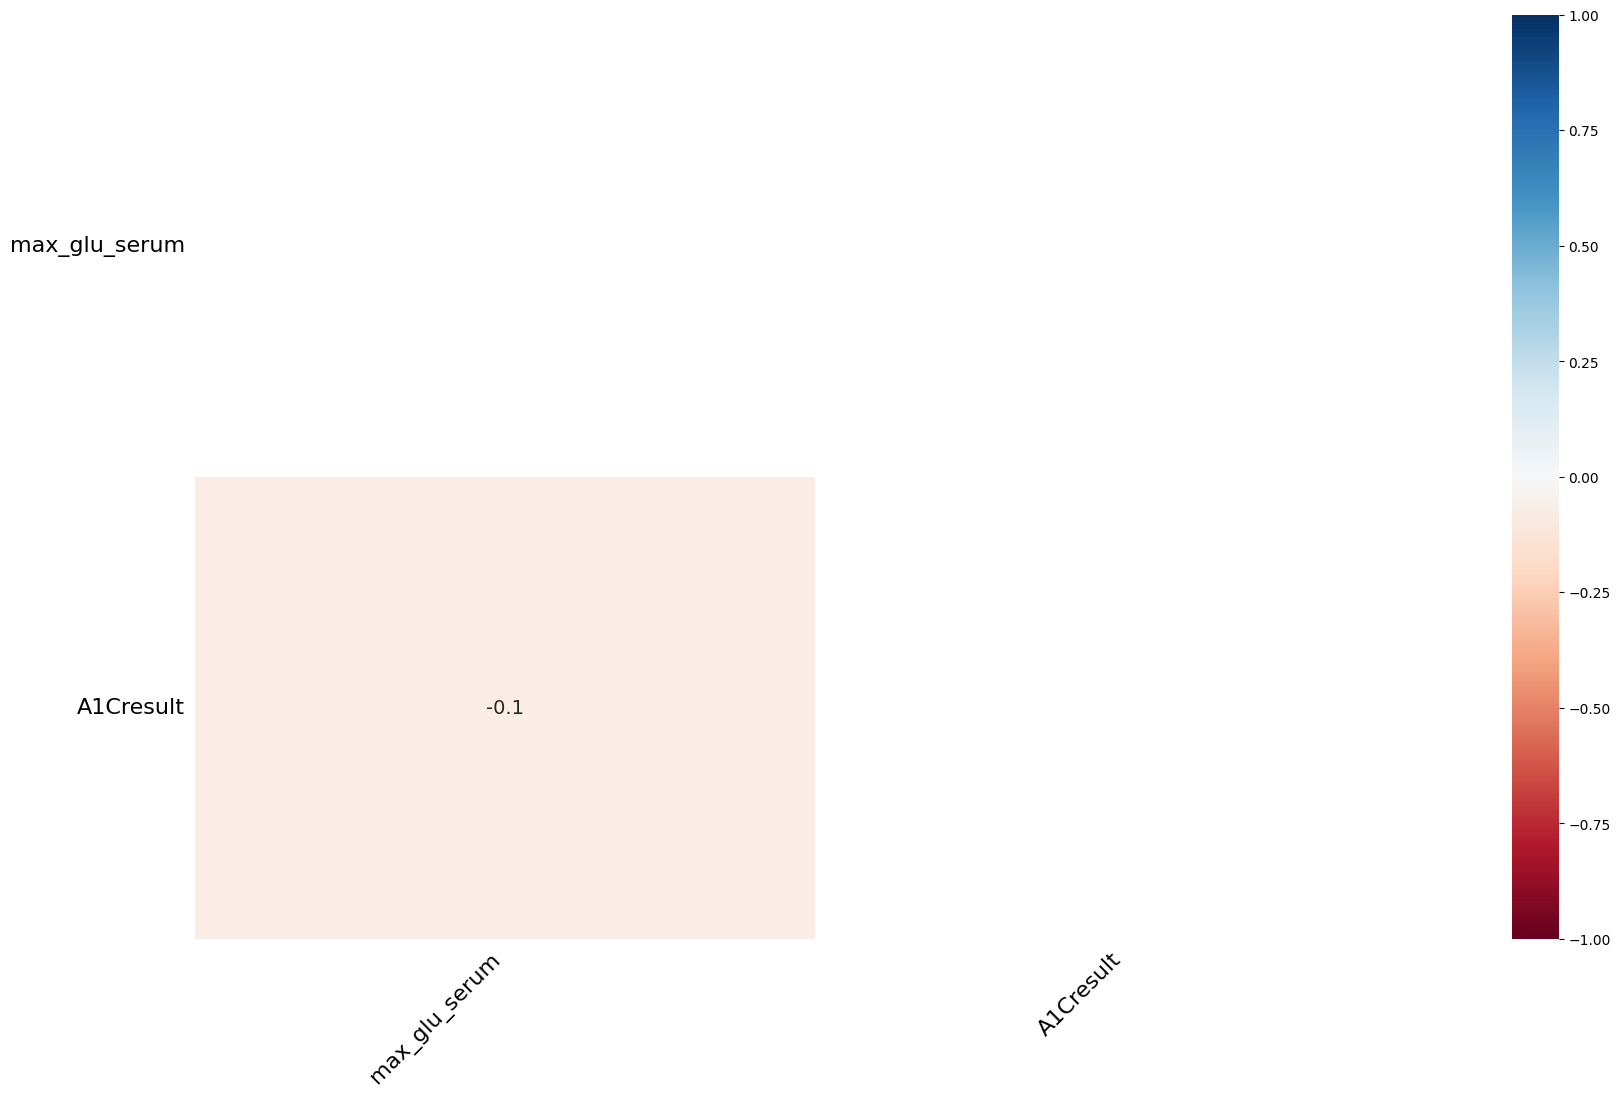

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [6]:
# Data Cleaning

import matplotlib.pyplot as plt
# check for missing value
print("Missing values per column:\n", data.isnull().sum())

# Visualizing missing values
msno.matrix(data)
plt.show()

msno.bar(data)
plt.show()

msno.heatmap(data)
plt.show()

# Create a copy to safely determine indices to drop
df_copy = df.copy()

drop_Idx = set (df_copy[(df_copy['diag_1'] == '?') & (df_copy ['diag_2']== '?') & (df_copy['diag_3']== '?')].index)

drop_Idx = drop_Idx.union(set(df_copy[df_copy['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df_copy[df_copy['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df_copy[df_copy['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df_copy[df_copy['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df_copy[df_copy['discharge_disposition_id'] == 11 ].index))
drop_Idx = drop_Idx.union(set(df_copy[df_copy['gender'] == 'Unknown/Invalid'].index))

# Drop rows from the original DataFrame using the determined indices
df = df.drop(index=list(drop_Idx))


for col in df.columns:
  if df[col].dtype == 'object':
    # Check for '?' values in object columns
    print(col,(df[col] [df[col] == '?'].count()))

# The columns 'citoglipton' and 'examide' were already dropped earlier in the cell.
# Removing the redundant drop here.
# df = df.drop(['citoglipton', 'examide'], axis=1)

In [7]:
  # DATA TRANSFORMATION

  # feature engineering
  df ['readmitted'] = df['readmitted'].replace('>30', 0)
  df ['readmitted'] = df['readmitted'].replace('<30', 1)
  df ['readmitted'] = df['readmitted'].replace('NO', 0)


  # creating additional columns for diagnosis

df ['level1_diag1'] = df['diag_1']
df ['level2_diag1'] = df['diag_1']
df ['level1_diag2'] = df['diag_2']
df ['level2_diag2'] = df['diag_2']
df ['level1_diag3'] = df['diag_3']
df ['level2_diag3'] = df['diag_3']

#

df.loc [df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc [df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc [df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc [df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc [df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc [df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0

df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)


# service utilization
df['service_utilization'] = df['number_inpatient'] + df['number_outpatient']
df.head(10).T

# Sampling
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

X = df.drop('readmitted', axis=1)  # 'readmitted' is the target column
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Original dataset shape {}'. format(Counter(y_train)))


Original dataset shape Counter({0: 68345, 1: 8811})


In [8]:
sm=SMOTE(random_state=20)
df.head().T

# convert data type of nominal features in dataframe to object type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
   'A1Cresult', 'metformin','repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 'acetohexamide', \
    'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', \
    'troglitazone','tolazamide','insulin','glyburide-metformin',\
    'glimepiride-pioglitazone' , 'metformin-rosiglitazone', 'metformin-pioglitazone','change','diabetesMed',\
    'age', 'max_glu_serum','level1_diag1','level2_diag1','level1_diag2','level2_diag2','level1_diag3','level2_diag3' ] # Corrected column names
df[i] = df[i].astype('object')
df.dtypes

,0
encounter_id,object
patient_nbr,object
race,object
gender,object
age,object
admission_type_id,object
discharge_disposition_id,object
admission_source_id,object
time_in_hospital,int64
num_lab_procedures,int64


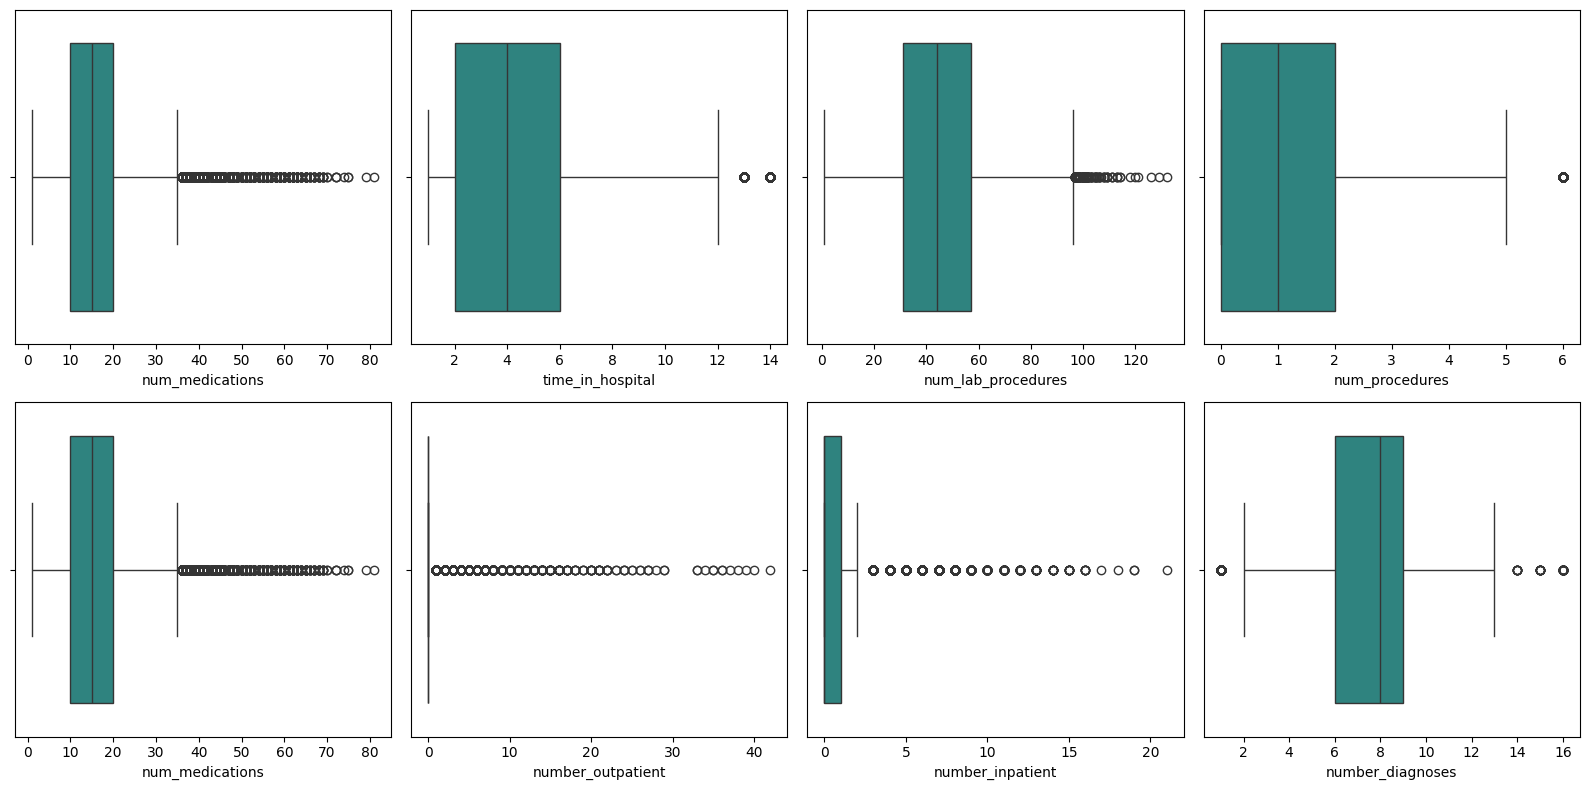

In [9]:
# feature scaling
# Define numerical columns
numerics = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_outpatient', 'number_inpatient', 'number_diagnoses', 'service_utilization']

datf = pd.DataFrame() # Corrected typo
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset=['patient_nbr'], keep='first')
df2.shape

# Standardize function
def Standardize(raw_data):
  return (raw_data - np.mean(raw_data, axis=0)) / np.std(raw_data, axis=0)

# Apply standardization - Corrected indentation
df2[numerics] = Standardize(df2[numerics])

# Outlier detection - Corrected function definition and loop syntax
def boxplot_for_outlier(df, columns):
    count = 0
    # Adjusted subplot grid based on the number of columns to plot
    nrows = (len(columns) + 3) // 4
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))

    # Flatten the ax array for easy iteration
    ax = ax.flatten()

    for i in range(len(columns)):
        sns.boxplot(x=df[columns[i]], palette = "viridis" ,ax=ax[i])
        count += 1

    # Hide any unused subplots
    for j in range(len(columns), len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()

numerical_columns = ['num_medications',
                     'time_in_hospital',
                     'num_lab_procedures',
                     'num_procedures',
                     'num_medications',
                     'number_outpatient',
                     'number_inpatient', # Removed 'number_emergency'
                     'number_diagnoses']
boxplot_for_outlier(data, numerical_columns)





In [10]:
# Preprocessing: One-Hot Encoding and Scaling

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include='object').columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Explicitly convert categorical columns to string type
for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)


# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (if any) - though none expected here
)

# Apply preprocessing to the training and testing data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)

Shape of X_train_encoded: (77156, 6190)
Shape of X_test_encoded: (19290, 6190)


In [11]:
# MODELLING
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, accuracy_score, recall_score,
    confusion_matrix, classification_report, roc_auc_score, f1_score
)
import pandas as pd
import numpy as np

# Random Forest classifier
rm = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    criterion='gini',
    min_samples_split=2,
    random_state=42
)
rm.fit(X_train_encoded, y_train)

# Predictions
rm_pred = rm.predict(X_test_encoded)
rm_proba = rm.predict_proba(X_test_encoded)[:, 1]  # for AUC

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rm_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Specificity
specificity = tn / (tn + fp)

# Print Confusion Matrix
print("🔢 Confusion Matrix:")
display(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(rm_pred, name='Predicted'), margins=True))

# Print Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, rm_pred))

# Print All Metrics
print(" Accuracy :", accuracy_score(y_test, rm_pred))
print(" Precision:", precision_score(y_test, rm_pred, average='weighted'))
print(" Recall   :", recall_score(y_test, rm_pred, average='weighted'))
print(" F1 Score :", f1_score(y_test, rm_pred, average='weighted'))
print(" Specificity:", specificity)
print(" AUC      :", roc_auc_score(y_test, rm_proba))


🔢 Confusion Matrix:


Predicted,0,All
Actual,,
0,3149,3149
1,435,435
All,3584,3584



📊 Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     17035
           1       0.00      0.00      0.00      2255

    accuracy                           0.88     19290
   macro avg       0.44      0.50      0.47     19290
weighted avg       0.78      0.88      0.83     19290

 Accuracy : 0.8831000518403318
 Precision: 0.7798657015603967
 Recall   : 0.8831000518403318
 F1 Score : 0.8282785620426731
 Specificity: 1.0
 AUC      : 0.6428349485245259


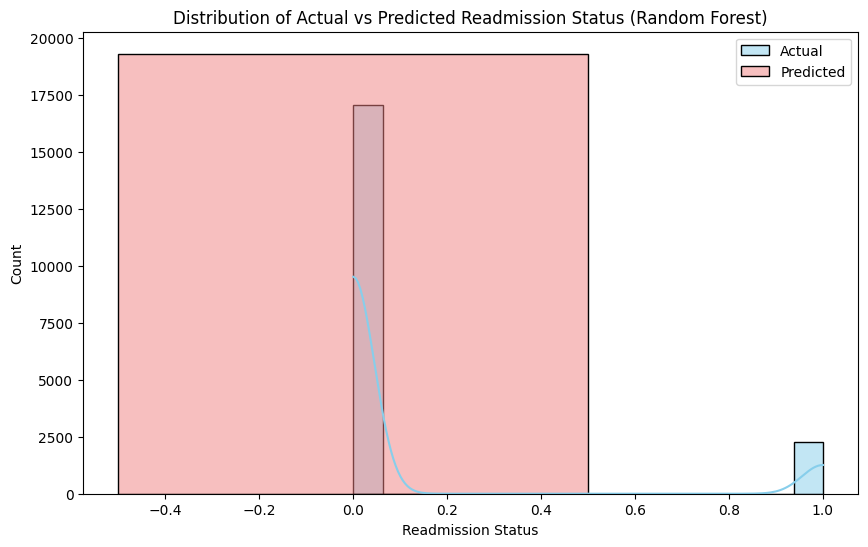

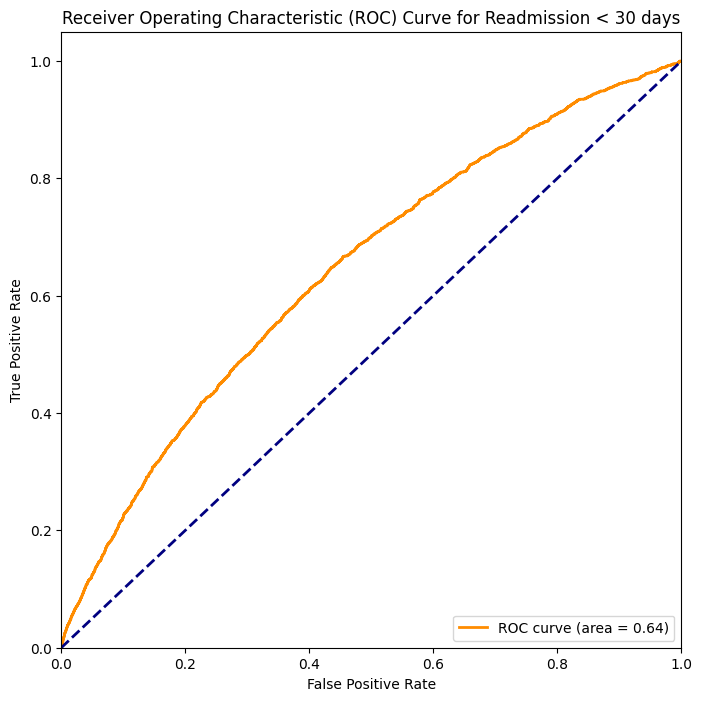

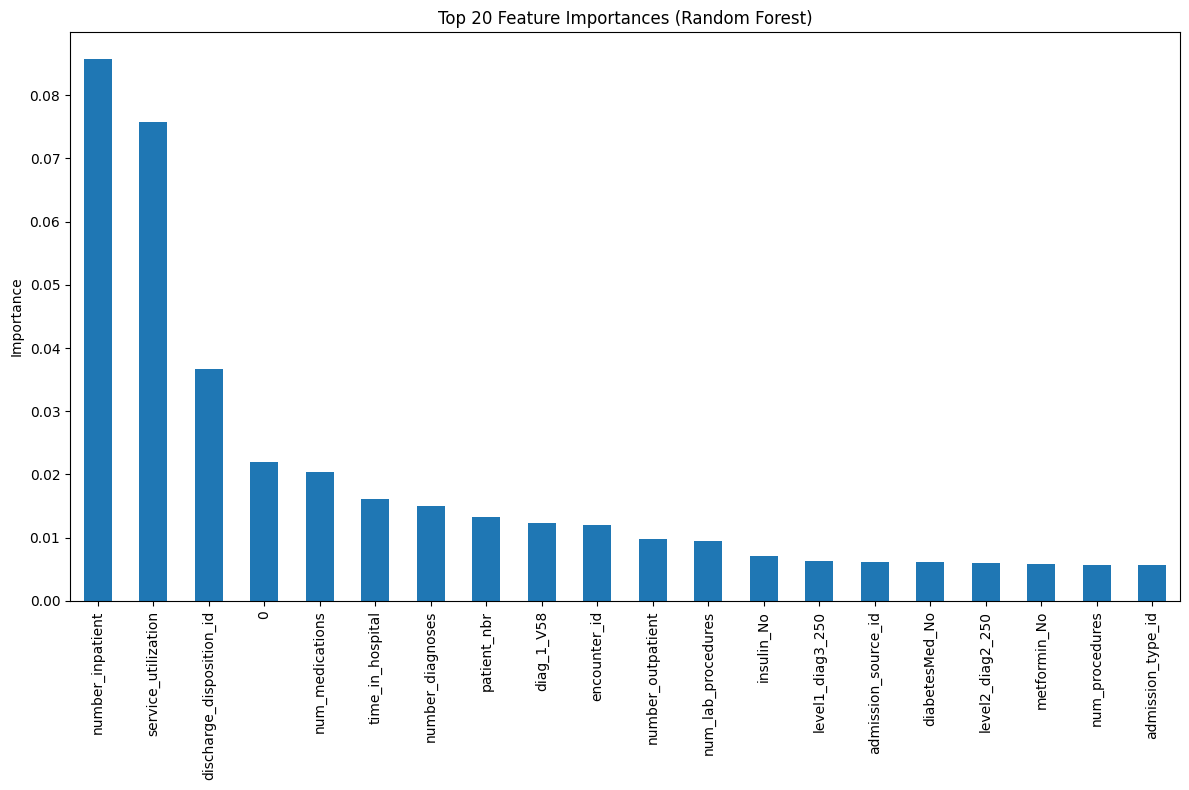

In [12]:
# To visualize this results

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Assuming preprocessor from cell 5cb91880 is available in the environment
try:
    # Get feature names after one-hot encoding and scaling
    # Get numeric feature names from the preprocessor
    numeric_features_out = preprocessor.transformers_[0][2]

    # Get categorical feature names from the one-hot encoder
    # preprocessor.transformers_ is a list of tuples (name, transformer, columns)
    # The one-hot encoder is the second transformer (index 1)
    onehot_encoder = preprocessor.transformers_[1][1]
    categorical_features_out = onehot_encoder.get_feature_names_out(preprocessor.transformers_[1][2])

    # Combine all feature names
    feature_names = list(numeric_features_out) + list(categorical_features_out)

except Exception as e:
    print(f"Could not retrieve feature names from preprocessor: {e}")
    feature_names = None # Handle the case where feature names couldn't be retrieved


plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='skyblue', label='Actual', kde=True)
sns.histplot(rm_pred, color='lightcoral', label='Predicted', kde=True)
plt.title('Distribution of Actual vs Predicted Readmission Status (Random Forest)')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.legend()
plt.show()

# Assuming rm from cell Th2TL2R3GbuE is available in the environment
# rm_prob = rm.predict_proba(X_test_encoded) # This line is not needed here as rm_proba is already calculated in cell Th2TL2R3GbuE

# If rm.classes_ is [0, 1]: (Based on the classification report output which shows classes 0 and 1)
# No need to check for [0, 1, 2] based on the current classification report output.
# The code in cell Th2TL2R3GbuE already extracts the probability for class 1 correctly.
# rm_proba is already calculated in cell Th2TL2R3GbuE.

# Create a binary target for ROC: 1 if y_test is 1, 0 otherwise
# This is also correctly handled in cell Th2TL2R3GbuE.
# y_test_binary_class_1 = (y_test == 1).astype(int)

# Calculate ROC curve
# Use y_test and rm_proba directly from the previous cell's output
fpr, tpr, thresholds = roc_curve(y_test, rm_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Readmission < 30 days')
plt.legend(loc="lower right")
plt.show()


if hasattr(rm, 'feature_importances_') and feature_names is not None and len(feature_names) == len(rm.feature_importances_):
    importances = pd.Series(rm.feature_importances_, index=feature_names)
    importances = importances.sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    importances[:20].plot(kind='bar') # Plot top 20 features
    plt.title('Top 20 Feature Importances (Random Forest)')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot feature importances. Check if the model is trained, if feature names are available, or if feature importances match the number of features.")


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     17035
           1       0.21      0.11      0.15      2255

    accuracy                           0.85     19290
   macro avg       0.55      0.53      0.53     19290
weighted avg       0.81      0.85      0.83     19290

Accuracy     : 0.8471
Precision    : 0.8103
Recall       : 0.8471
F1 Score     : 0.8262
Specificity  : 0.9442
AUC-ROC      : 0.5396


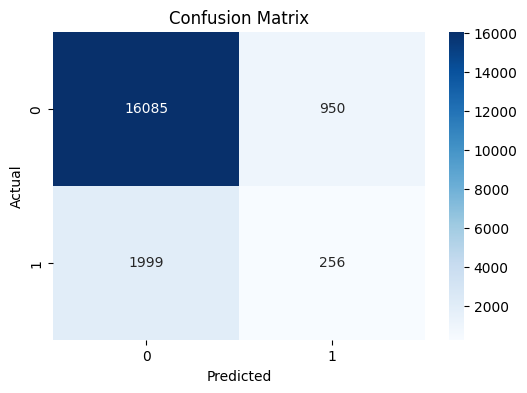

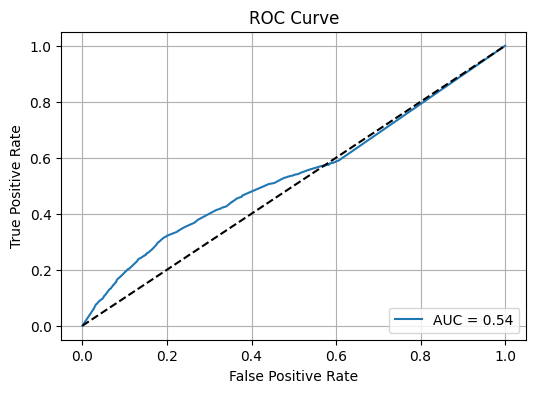

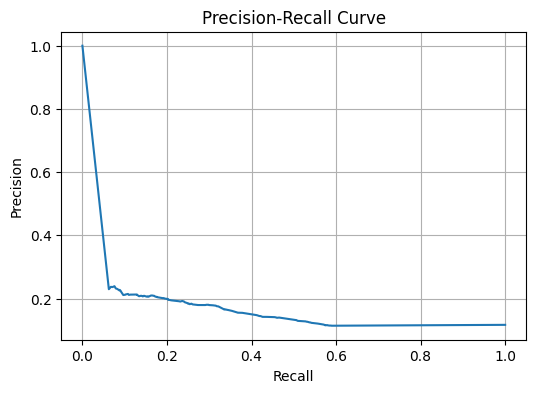

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve
)

# Train the Decision Tree
dtree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=28,
    min_samples_split=10,
    random_state=42
)
dtree.fit(X_train_encoded, y_train)

# Predictions
y_pred = dtree.predict(X_test_encoded)
y_proba = dtree.predict_proba(X_test_encoded)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(y_test, y_proba)

# Print Metrics
print("Accuracy     :", round(accuracy, 4))
print("Precision    :", round(precision, 4))
print("Recall       :", round(recall, 4))
print("F1 Score     :", round(f1, 4))
print("Specificity  :", round(specificity, 4))
print("AUC-ROC      :", round(auc_roc, 4))



# 1. Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 3. Precision-Recall Curve (Optional)
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()




Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     17035
           1       0.21      0.03      0.05      2255

    accuracy                           0.87     19290
   macro avg       0.55      0.51      0.49     19290
weighted avg       0.81      0.87      0.83     19290

Accuracy     : 0.8741
Precision    : 0.8063
Recall       : 0.8741
F1 Score     : 0.8295
Specificity  : 0.986
AUC-ROC      : 0.5351


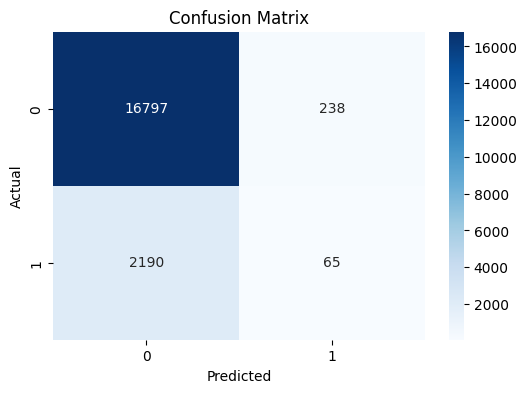

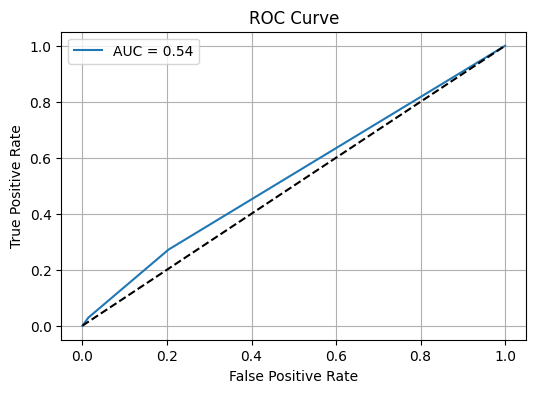

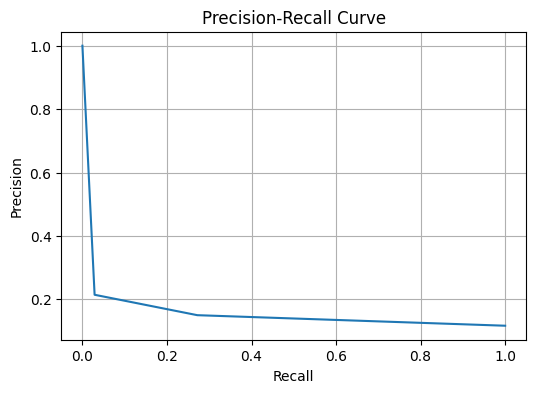

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix # Import csr_matrix

# Step 1: Reduce sample size (for memory efficiency)
# Convert to DataFrame before sampling, preserving the original index from X_train
if isinstance(X_train_encoded, np.ndarray):
    # Use the index from the original X_train DataFrame
    X_train_encoded_df = pd.DataFrame(X_train_encoded, index=X_train.index, columns=[f'feature_{i}' for i in range(X_train_encoded.shape[1])])
elif isinstance(X_train_encoded, csr_matrix):
     # Convert sparse matrix to DataFrame for sampling
     X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), index=X_train.index, columns=[f'feature_{i}' for i in range(X_train_encoded.shape[1])])
else:
    X_train_encoded_df = X_train_encoded # It's already a DataFrame


X_train_small = X_train_encoded_df.sample(n=10000, random_state=42)
y_train_small = y_train.loc[X_train_small.index]


# Step 2: PCA for dimensionality reduction
pca = PCA(n_components=50, random_state=42)

# Fit PCA on the full (potentially sparse) training data
pca.fit(X_train_encoded)

# Transform both sampled training data (converted to dense) and test data (converted to dense)
X_train_pca = pca.transform(X_train_small.to_numpy()) # Convert sampled DataFrame to numpy array
X_test_pca = pca.transform(X_test_encoded.toarray()) # Convert sparse test data to dense numpy array


# Step 3: Train KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_pca, y_train_small)
knn_pred = knn.predict(X_test_pca)
knn_proba = knn.predict_proba(X_test_pca)[:, 1]

# Step 4: Confusion matrix
cm = confusion_matrix(y_test, knn_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Step 5: Metrics
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred, average='weighted')
recall = recall_score(y_test, knn_pred, average='weighted')
f1 = f1_score(y_test, knn_pred, average='weighted')
auc = roc_auc_score(y_test, knn_proba)

# Step 6: Print metrics
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))

print("Accuracy     :", round(accuracy, 4))
print("Precision    :", round(precision, 4))
print("Recall       :", round(recall, 4))
print("F1 Score     :", round(f1, 4))
print("Specificity  :", round(specificity, 4))
print("AUC-ROC      :", round(auc, 4))

# Step 7: Visualizations

# 1. Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, knn_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# 3. Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, knn_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     17035
           1       0.47      0.01      0.02      2255

    accuracy                           0.88     19290
   macro avg       0.68      0.51      0.48     19290
weighted avg       0.84      0.88      0.83     19290

Accuracy     : 0.8829
Precision    : 0.8362
Recall       : 0.8829
F1 Score     : 0.8308
Specificity  : 0.9982
AUC-ROC      : 0.627


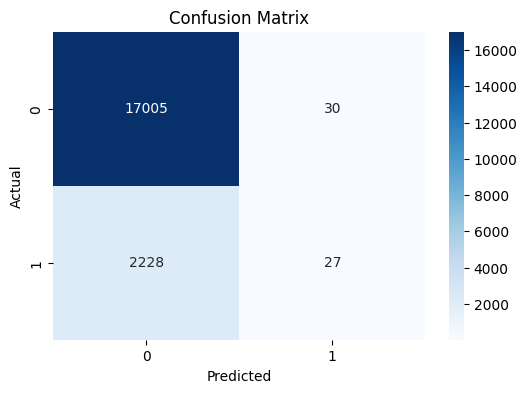

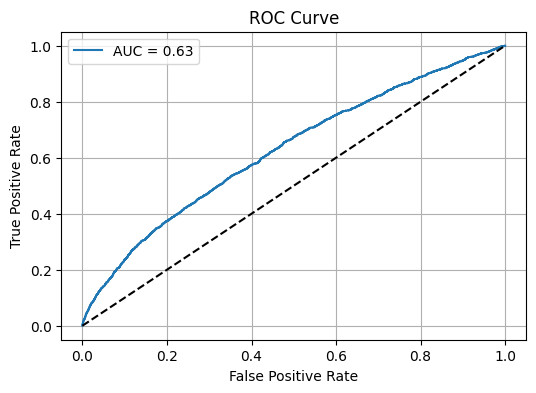

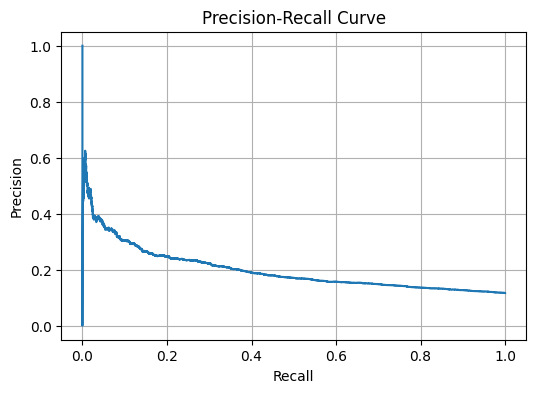

In [15]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, confusion_matrix,
    roc_curve, precision_recall_curve
)
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix # Import csr_matrix

# Step 1: Sample training data
# Convert to DataFrame before sampling, preserving the original index from X_train
if isinstance(X_train_encoded, np.ndarray):
    # Use the index from the original X_train DataFrame
    X_train_encoded_df = pd.DataFrame(X_train_encoded, index=X_train.index, columns=[f'feature_{i}' for i in range(X_train_encoded.shape[1])])
elif isinstance(X_train_encoded, csr_matrix):
     # Convert sparse matrix to DataFrame for sampling
     X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), index=X_train.index, columns=[f'feature_{i}' for i in range(X_train_encoded.shape[1])])
else:
    X_train_encoded_df = X_train_encoded # It's already a DataFrame

X_train_sample = X_train_encoded_df.sample(n=10000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Convert sampled training data to dense array for PCA and LinearSVC
X_train_sample_dense = X_train_sample.to_numpy()

# Step 2: PCA for dimensionality reduction
pca = PCA(n_components=50, random_state=42)
pca.fit(X_train_sample_dense) # Fit PCA on sampled dense data

# Convert test data to dense array for PCA transformation and LinearSVC
X_test_encoded_dense = X_test_encoded.toarray()
X_test_pca = pca.transform(X_test_encoded_dense)

X_train_pca = pca.transform(X_train_sample_dense)


# Step 3: Train linear SVM with probability estimates using calibration
svc = LinearSVC(max_iter=10000, random_state=42)
calibrated_svc = CalibratedClassifierCV(estimator=svc, method='sigmoid')
calibrated_svc.fit(X_train_pca, y_train_sample)

# Step 4: Predict labels and probabilities
svc_pred = calibrated_svc.predict(X_test_pca)
svc_proba = calibrated_svc.predict_proba(X_test_pca)[:, 1]

# Step 5: Confusion Matrix & Specificity
cm = confusion_matrix(y_test, svc_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Step 6: Metrics
accuracy = accuracy_score(y_test, svc_pred)
precision = precision_score(y_test, svc_pred, average='weighted')
recall = recall_score(y_test, svc_pred, average='weighted')
f1 = f1_score(y_test, svc_pred, average='weighted')
auc = roc_auc_score(y_test, svc_proba)

# Step 7: Print evaluation
print("Classification Report:\n", classification_report(y_test, svc_pred))
print("Accuracy     :", round(accuracy, 4))
print("Precision    :", round(precision, 4))
print("Recall       :", round(recall, 4))
print("F1 Score     :", round(f1, 4))
print("Specificity  :", round(specificity, 4))
print("AUC-ROC      :", round(auc, 4))

# Step 8: Confusion Matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: ROC Curve
fpr, tpr, _ = roc_curve(y_test, svc_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, svc_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     17035
           1       0.51      0.01      0.03      2255

    accuracy                           0.88     19290
   macro avg       0.70      0.51      0.48     19290
weighted avg       0.84      0.88      0.83     19290

Accuracy     : 0.8832
Precision    : 0.8404
Recall       : 0.8832
F1 Score     : 0.8313
Specificity  : 0.9982
AUC-ROC      : 0.642


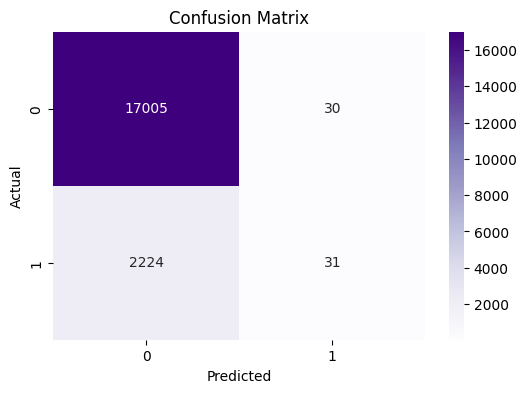

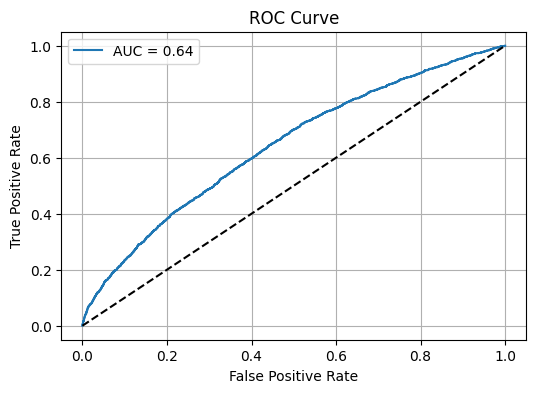

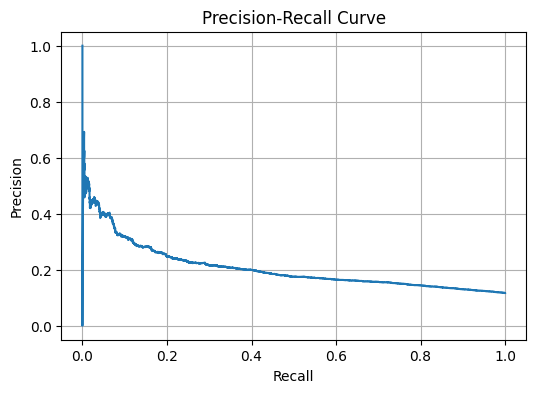

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
)
from scipy import sparse

# Step 1: Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
X_train_reduced = selector.fit_transform(X_train_encoded)
X_test_reduced = selector.transform(X_test_encoded)

# Step 2: Downsample training data
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_reduced, y_train, train_size=0.5, random_state=42, stratify=y_train
)

# Step 3: Scale without centering (preserve sparsity)
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_sampled)
X_test_scaled = scaler.transform(X_test_reduced)

# Step 4: Convert to sparse matrices
X_train_sparse = sparse.csr_matrix(X_train_scaled)
X_test_sparse = sparse.csr_matrix(X_test_scaled)

# Step 5: Train Logistic Regression
logreg = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    fit_intercept=True,
    max_iter=200,
    tol=1e-2,
    C=0.1
)
logreg.fit(X_train_sparse, y_train_sampled)

# Step 6: Predict
logreg_pred = logreg.predict(X_test_sparse)
logreg_proba = logreg.predict_proba(X_test_sparse)[:, 1]

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, logreg_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Step 8: Evaluation Metrics
accuracy = accuracy_score(y_test, logreg_pred)
precision = precision_score(y_test, logreg_pred, average='weighted')
recall = recall_score(y_test, logreg_pred, average='weighted')
f1 = f1_score(y_test, logreg_pred, average='weighted')
auc = roc_auc_score(y_test, logreg_proba)

# Print Results
print("\n📊 Classification Report:")
print(classification_report(y_test, logreg_pred))
print("Accuracy     :", round(accuracy, 4))
print("Precision    :", round(precision, 4))
print("Recall       :", round(recall, 4))
print("F1 Score     :", round(f1, 4))
print("Specificity  :", round(specificity, 4))
print("AUC-ROC      :", round(auc, 4))

# Step 9: Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 10: ROC Curve
fpr, tpr, _ = roc_curve(y_test, logreg_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()

# Step 11: Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, logreg_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     17035
           1       0.55      0.01      0.01      2255

    accuracy                           0.88     19290
   macro avg       0.72      0.50      0.48     19290
weighted avg       0.84      0.88      0.83     19290

Accuracy     : 0.8833
Precision    : 0.8449
Recall       : 0.8833
F1 Score     : 0.8299
Specificity  : 0.9992
AUC-ROC      : 0.6612


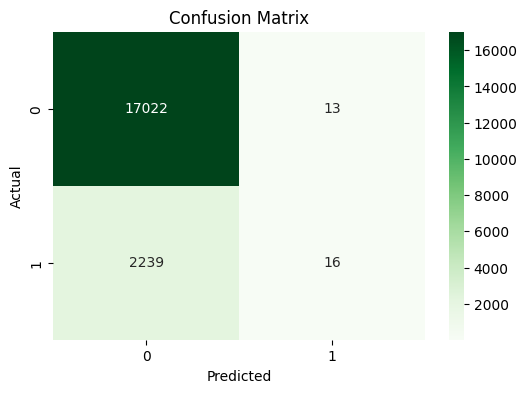

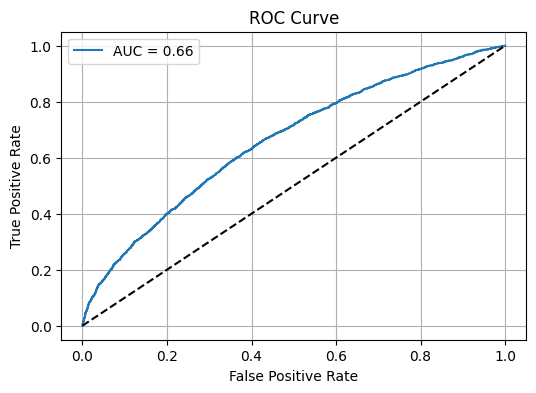

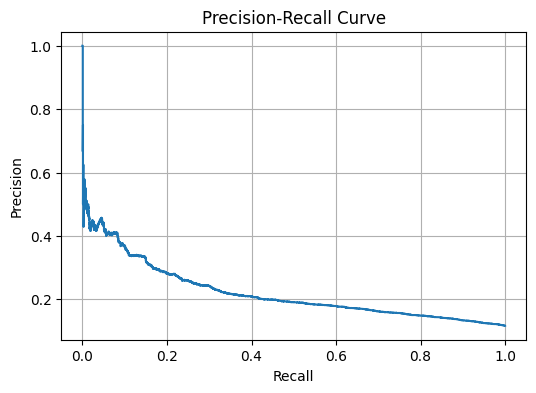

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve
)

# Step 1: Identify numeric and categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Clean categorical columns
X_train[categorical_cols] = X_train[categorical_cols].fillna("Missing").astype(str)
X_test[categorical_cols] = X_test[categorical_cols].fillna("Missing").astype(str)

# Step 3: Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_cols)
])

# Step 4: Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Step 5: Fit
pipeline.fit(X_train, y_train)

# Step 6: Predict
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Step 8: Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_proba)

# Step 9: Display Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"Specificity  : {specificity:.4f}")
print(f"AUC-ROC      : {auc:.4f}")

# Step 10: Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()

# Step 12: Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(rec, prec)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()



=== XGBoost Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     68345
           1       0.66      0.01      0.02      8811

    accuracy                           0.89     77156
   macro avg       0.78      0.50      0.48     77156
weighted avg       0.86      0.89      0.83     77156


=== XGBoost Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     17035
           1       0.50      0.00      0.01      2255

    accuracy                           0.88     19290
   macro avg       0.69      0.50      0.47     19290
weighted avg       0.84      0.88      0.83     19290

Accuracy      : 0.8831
Precision     : 0.8386
Recall        : 0.8831
F1 Score      : 0.8292
Specificity   : 0.9995
AUC-ROC Score : 0.6631


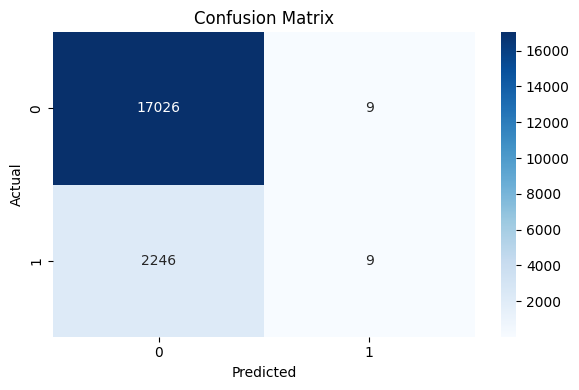

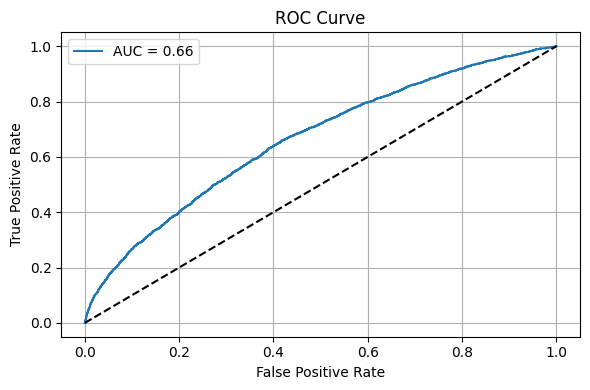

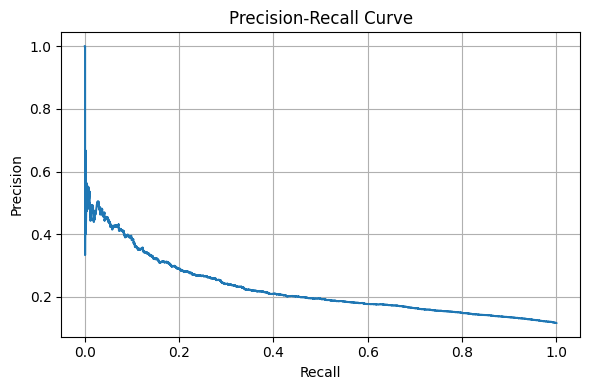

In [18]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve, classification_report
)
from sklearn.feature_selection import VarianceThreshold
from scipy import sparse # Import sparse

# Step 1: Feature selection using Variance Threshold (works with sparse matrices)
selector = VarianceThreshold(threshold=0.01)
X_train_selected = selector.fit_transform(X_train_encoded)
X_test_selected = selector.transform(X_test_encoded)

# Step 2: Define XGBoost model
# XGBoost can handle sparse input directly
xgb_model = xgb.XGBClassifier(
    n_jobs=-1,  # Use all cores
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)

# Step 3: Train the model
xgb_model.fit(X_train_selected, y_train) # Use the selected sparse data

# Step 4: Predict
y_train_pred = xgb_model.predict(X_train_selected)
y_test_pred = xgb_model.predict(X_test_selected)
y_test_proba = xgb_model.predict_proba(X_test_selected)[:, 1]

# Step 5: Metrics
print("=== XGBoost Classification Report (Train) ===")
print(classification_report(y_train, y_train_pred))

print("\n=== XGBoost Classification Report (Test) ===")
print(classification_report(y_test, y_test_pred))

# Additional metrics
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print(f"Accuracy      : {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision     : {precision_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Recall        : {recall_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"F1 Score      : {f1_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Specificity   : {specificity:.4f}")
print(f"AUC-ROC Score : {roc_auc_score(y_test, y_test_proba):.4f}")

# Step 6: Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 7: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_test_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()

DataFrame 'df' found. Proceeding with stacking.
Training Stacking Classifier...
Training Complete.

Evaluating Stacking Classifier on Test Set...

📊 Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17077
           1       0.46      0.03      0.05      2213

    accuracy                           0.88     19290
   macro avg       0.68      0.51      0.49     19290
weighted avg       0.84      0.88      0.84     19290

Accuracy: 0.8848107827890098
Precision (weighted): 0.8390648829442753
Recall (weighted): 0.8848107827890098
F1 Score (weighted): 0.8367830830123426
Specificity: 0.996
AUC-ROC: 0.6583099419891842


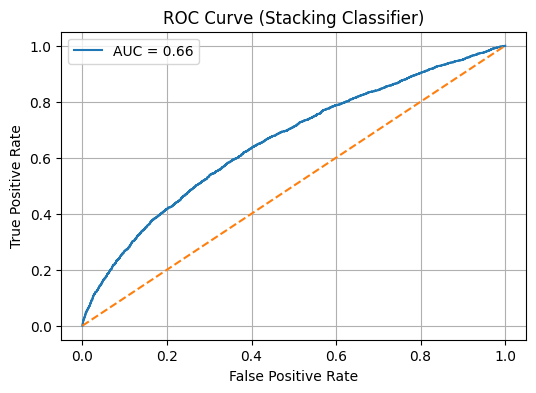

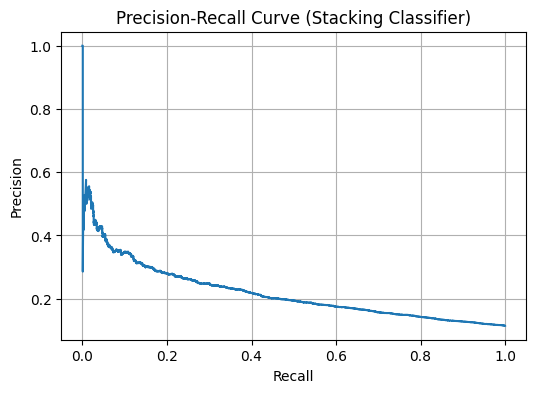

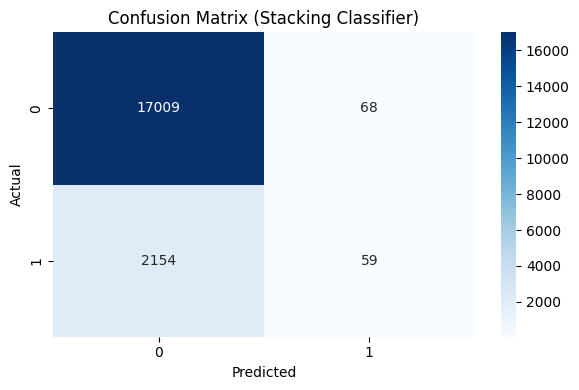

In [19]:
# prompt: was fold performed in this notebook. perform it then

import warnings
# Import necessary libraries for Stacking
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from scipy import sparse
from collections import Counter # Assuming Counter is needed for SMOTE if you re-apply it
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Check if df exists and is a DataFrame
if 'df' in globals() and isinstance(df, pd.DataFrame):
    print("DataFrame 'df' found. Proceeding with stacking.")

    # Re-run train-test split just in case
    # Assuming 'readmitted' is the target column and exists in df
    if 'readmitted' in df.columns:
        # Identify categorical and numerical columns from the *original* data before splitting
        # Based on your code, it seems you set some columns to 'object' dtype.
        # Let's try to infer from the last dtypes check before splitting.
        categorical_cols = df.select_dtypes(include='object').columns.tolist()
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # Assuming remaining are numeric

        # Ensure target variable is not in features
        if 'readmitted' in categorical_cols:
            categorical_cols.remove('readmitted')
        if 'readmitted' in numeric_cols:
            numeric_cols.remove('readmitted')

        # Separate features and target
        X = df.drop('readmitted', axis=1)
        y = df['readmitted']

        # Split data again to ensure fresh split for stacking
        # Use stratify for imbalanced data if necessary
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Explicitly convert categorical columns to string type to avoid TypeError in OneHotEncoder
        for col in categorical_cols:
            X_train[col] = X_train[col].astype(str)
            X_test[col] = X_test[col].astype(str)

        # Create preprocessing pipeline using ColumnTransformer
        # Impute numerical columns with mean
        # One-hot encode categorical columns (handle unknown values and output sparse matrix)
        preprocessor = ColumnTransformer(transformers=[
            ('num', SimpleImputer(strategy='mean'), numeric_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_cols)
        ], remainder='passthrough') # Keep remaining columns (should be none if lists are exhaustive)

        # --- Define Base Estimators ---
        # Use pipelines for base estimators to include preprocessing

        # Base Model 1: Logistic Regression (memory efficient due to penalty/solver and potential data reduction)
        # Use a separate variance threshold and scaling *within* this pipeline if desired,
        # but for simplicity in stacking, let the main preprocessor handle global feature space.
        # Adjust C and solver for potentially larger datasets if needed.
        base_logreg = LogisticRegression(
            penalty='l1',
            solver='liblinear',
            max_iter=200,
            tol=1e-2,
            C=0.1,
            random_state=42
        )
        # Wrap in a pipeline for consistency with the preprocessor output
        pipeline_logreg = make_pipeline(preprocessor, base_logreg)


        # Base Model 2: Decision Tree
        # Adjust max_depth or min_samples_split/leaf for memory if needed
        base_dtree = DecisionTreeClassifier(
            criterion='entropy',
            max_depth=28, # From your notebook
            min_samples_split=10, # From your notebook
            random_state=42 # Added random state for reproducibility
        )
        pipeline_dtree = make_pipeline(preprocessor, base_dtree)

        # Base Model 3: Random Forest
        # Adjust n_estimators, max_depth for memory
        base_rf = RandomForestClassifier(
            n_estimators=100, # From your notebook
            max_depth=10,     # From your notebook
            criterion='gini', # From your notebook
            min_samples_split=2, # From your notebook
            random_state=42,
            n_jobs=-1 # Use multiple cores if available
        )
        pipeline_rf = make_pipeline(preprocessor, base_rf)

        # --- Define Final Estimator ---
        # Typically a simple model like Logistic Regression
        final_estimator = LogisticRegression(random_state=42)

        # --- Build Stacking Classifier ---
        # The estimators are the base models (pipelines in this case)
        # The final_estimator is the model trained on the predictions of the base models
        stacking_clf = StackingClassifier(
            estimators=[
                ('logreg', pipeline_logreg),
                ('dtree', pipeline_dtree),
                ('rf', pipeline_rf)
            ],
            final_estimator=final_estimator,
            cv=5, # Number of cross-validation folds for training the final estimator
            n_jobs=-1 # Use multiple cores if available
        )

        # --- Train the Stacking Model ---
        print("Training Stacking Classifier...")
        stacking_clf.fit(X_train, y_train)
        print("Training Complete.")

        # --- Evaluate the Stacking Model ---
        print("\nEvaluating Stacking Classifier on Test Set...")
        stacking_pred = stacking_clf.predict(X_test)
        stacking_prob = stacking_clf.predict_proba(X_test) # Get probabilities

        # Confusion matrix and metrics
        cm = confusion_matrix(y_test, stacking_pred)
        tn, fp, fn, tp = cm.ravel()
        # Avoid division by zero if tn + fp is 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

        print("\n📊 Stacking Classifier Classification Report:")
        print(classification_report(y_test, stacking_pred))
        print("Accuracy:", accuracy_score(y_test, stacking_pred))
        print("Precision (weighted):", precision_score(y_test, stacking_pred, average='weighted'))
        print("Recall (weighted):", recall_score(y_test, stacking_pred, average='weighted'))
        print("F1 Score (weighted):", f1_score(y_test, stacking_pred, average='weighted'))
        print("Specificity:", round(specificity, 4))

        # AUC-ROC
        if stacking_prob.shape[1] == 2: # Ensure it's a binary classification problem
            auc = roc_auc_score(y_test, stacking_prob[:, 1])
            print("AUC-ROC:", auc)

            # ROC Curve
            fpr, tpr, _ = roc_curve(y_test, stacking_prob[:, 1])
            plt.figure(figsize=(6, 4))
            plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
            plt.plot([0, 1], [0, 1], linestyle='--')
            plt.title("ROC Curve (Stacking Classifier)")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend()
            plt.grid(True)
            plt.show()

            # Precision-Recall Curve
            precision, recall, _ = precision_recall_curve(y_test, stacking_prob[:, 1])
            plt.figure(figsize=(6, 4))
            plt.plot(recall, precision)
            plt.title("Precision-Recall Curve (Stacking Classifier)")
            plt.xlabel("Recall")
            plt.ylabel("Precision")
            plt.grid(True)
            plt.show()
        else:
             print("Cannot calculate AUC-ROC, model is not binary or probabilities not available.")


        # Confusion Matrix Heatmap
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
        plt.title("Confusion Matrix (Stacking Classifier)")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

    else:
        print("Target column 'readmitted' not found in DataFrame 'df'. Cannot perform stacking.")
else:
    print("DataFrame 'df' not found. Please ensure data loading and initial preprocessing steps are run.")
    print("Cannot perform stacking without the preprocessed DataFrame.")



📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17077
           1       0.46      0.03      0.05      2213

    accuracy                           0.88     19290
   macro avg       0.68      0.51      0.49     19290
weighted avg       0.84      0.88      0.84     19290

Accuracy: 0.8848107827890098
Precision (weighted): 0.8390648829442753
Recall (weighted): 0.8848107827890098
F1 Score (weighted): 0.8367830830123426
Specificity: 0.996
AUC-ROC: 0.6583099419891842


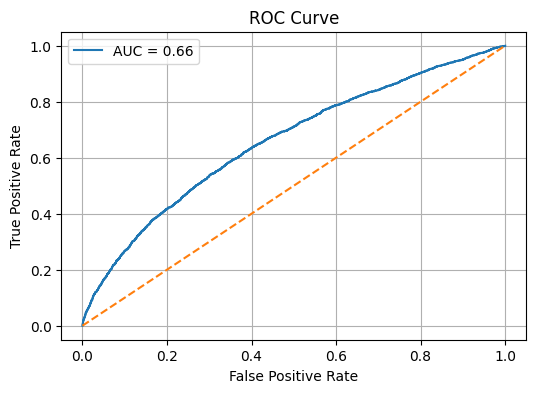

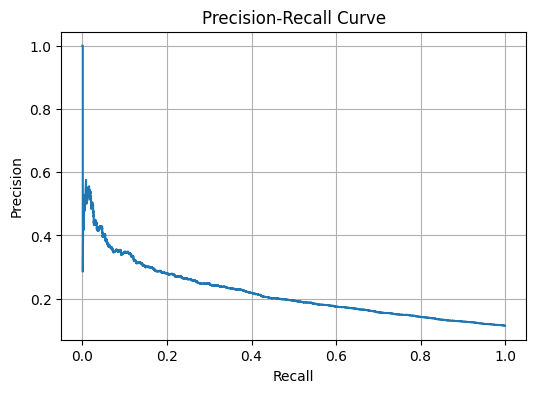

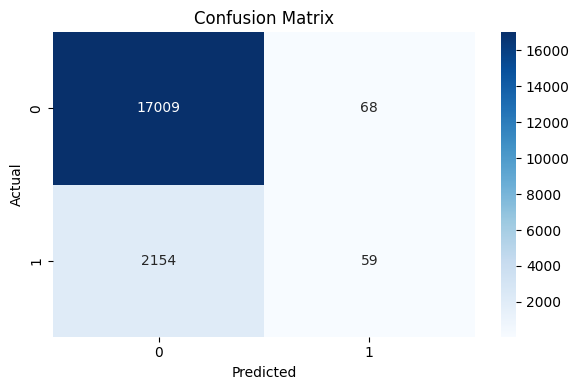

In [20]:
# Visualizing the stacked ensemble model
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve
)

# Confusion matrix and metrics
cm = confusion_matrix(y_test, stacking_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print("\n📊 Classification Report:")
print(classification_report(y_test, stacking_pred))
print("Accuracy:", accuracy_score(y_test, stacking_pred))
print("Precision (weighted):", precision_score(y_test, stacking_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test, stacking_pred, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test, stacking_pred, average='weighted'))
print("Specificity:", round(specificity, 4))

# AUC-ROC
if stacking_prob.shape[1] == 2:
    auc = roc_auc_score(y_test, stacking_prob[:, 1])
    print("AUC-ROC:", auc)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, stacking_prob[:, 1])
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, stacking_prob[:, 1])
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision)
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()